In this notebook, we present various usecases to interact with ptype to handle anomaly type predictions.

In [1]:
# Preamble to run notebook in context of source package.
# NBVAL_IGNORE_OUTPUT
import sys
sys.path.insert(0, '../')

In [2]:
from IPython.core.display import display

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcdefaults()

from ptype.Ptype import Ptype
import pandas as pd
import numpy as np
from utils import plot_bar, plot_column_type_posterior, plot_row_type_posterior

# Incorrect Anomaly Detection
### Mental Health in Tech Survey
This dataset is used to measure attitudes towards mental health and frequency of mental health disorders in the tech workplace (the dataset source is https://www.kaggle.com/osmi/mental-health-in-tech-2016).

In [3]:
df = pd.read_csv("../data/survey.csv", encoding="ISO-8859-1", dtype=str, keep_default_na=False)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NA,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NA
1,2014-08-27 11:29:37,44,M,United States,IN,NA,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NA
2,2014-08-27 11:29:44,32,Male,Canada,NA,NA,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NA
3,2014-08-27 11:29:46,31,Male,United Kingdom,NA,NA,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NA
4,2014-08-27 11:30:22,31,Male,United States,TX,NA,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NA


In [4]:
ptype = Ptype()
schema = ptype.schema_fit(df)

In [5]:
schema.show()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
type,date-non-std,integer,string,string,string,boolean,boolean,boolean,string,string,...,string,boolean,boolean,string,string,boolean,boolean,boolean,boolean,string
normal values,"[2014-08-27 11:29:31, 2014-08-27 11:29:37, 201...","[-1, -1726, -29, 11, 18, 19, 20, 21, 22, 23, 2...","[A little about you, Agender, All, Androgyne, ...","[Australia, Austria, Bahamas, The, Belgium, Bo...","[AL, AZ, CA, CO, CT, DC, FL, GA, IA, ID, IL, I...","[No, Yes]","[No, Yes]","[No, Yes]","[Never, Often, Rarely, Sometimes]","[1-5, 100-500, 26-100, 500-1000, 6-25, More th...",...,"[Somewhat difficult, Somewhat easy, Very diffi...","[No, Yes]","[No, Yes]","[No, Some of them, Yes]","[No, Some of them, Yes]","[No, Yes]","[No, Yes]","[No, Yes]","[No, Yes]",[A strong mind goes a long way. Stay strong. T...
missing values,[],[],[],[],[NA],[NA],[],[],[NA],[],...,[],[],[],[],[],[],[],[],[],"[ , -, NA]"
anomalous values,[],[],"[Female (cis), Female (trans), Guy (-ish) ^_^,...",[],[],[],[],[],[],[],...,[Don't know],[Maybe],[Maybe],[],[],[Maybe],[Maybe],[Don't know],[],[(yes but the situation was unusual and involv...


In [6]:
df['Age'].unique()

array(['37', '44', '32', '31', '33', '35', '39', '42', '23', '29', '36',
       '27', '46', '41', '34', '30', '40', '38', '50', '24', '18', '28',
       '26', '22', '19', '25', '45', '21', '-29', '43', '56', '60', '54',
       '329', '55', '99999999999', '48', '20', '57', '58', '47', '62',
       '51', '65', '49', '-1726', '5', '53', '61', '8', '11', '-1', '72'],
      dtype=object)

In [7]:
anomalous_values = ptype.get_anomalous_values()

anomalous_values.extend(['99999999999', '-1', '-1726', '-29'])
ptype.set_anomalous_values(anomalous_values)

schema = ptype.schema_fit(df)
schema.show()
# to-do: should we consider making this column specific rather than a global list
# this again can be done similar to how it is handled in pandas.read_csv which is 
# keep_default_na=False, na_values={'species':['']}

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
type,date-non-std,integer,string,string,string,boolean,boolean,boolean,string,string,...,string,boolean,boolean,string,string,boolean,boolean,boolean,boolean,string
normal values,"[2014-08-27 11:29:31, 2014-08-27 11:29:37, 201...","[11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2...","[A little about you, Agender, All, Androgyne, ...","[Australia, Austria, Bahamas, The, Belgium, Bo...","[AL, AZ, CA, CO, CT, DC, FL, GA, IA, ID, IL, I...","[No, Yes]","[No, Yes]","[No, Yes]","[Never, Often, Rarely, Sometimes]","[1-5, 100-500, 26-100, 500-1000, 6-25, More th...",...,"[Somewhat difficult, Somewhat easy, Very diffi...","[No, Yes]","[No, Yes]","[No, Some of them, Yes]","[No, Some of them, Yes]","[No, Yes]","[No, Yes]","[No, Yes]","[No, Yes]",[A strong mind goes a long way. Stay strong. T...
missing values,[],[],[],[],[NA],[NA],[],[],[NA],[],...,[],[],[],[],[],[],[],[],[],"[ , -, NA]"
anomalous values,[],"[-1, -1726, -29, 99999999999]","[Female (cis), Female (trans), Guy (-ish) ^_^,...",[],[],[],[],[],[],[],...,[Don't know],[Maybe],[Maybe],[],[],[Maybe],[Maybe],[Don't know],[],[(yes but the situation was unusual and involv...


# 2. Incorrect anomaly prediction

,Gender
972,Male
719,Man
979,Male
550,Woman
512,M
119,Male
1206,Male
107,Male
653,Female
1074,m


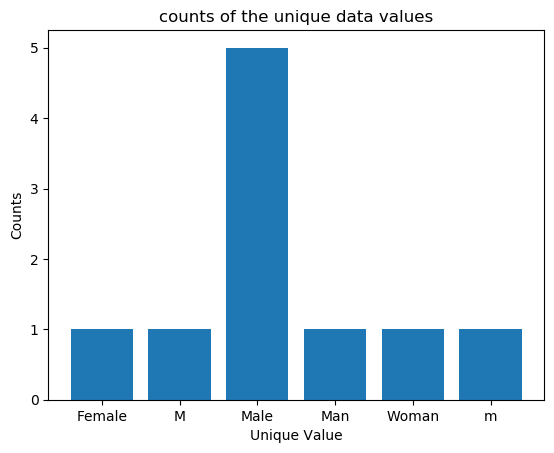

In [8]:
df = pd.read_csv("../data/survey.csv", encoding="ISO-8859-1", dtype=str, keep_default_na=False)

column = "Gender"
df_subsample = df.sample(n=10, random_state=1)[[column]]
display(df_subsample)

unique_values, counts = np.unique(
    [str(int_element) for int_element in df_subsample[column].tolist()],
    return_counts=True,
)
plot_bar(
    unique_values,
    counts,
    title="counts of the unique data values",
    y_lim_max=None,
    xlabel="Unique Value",
    ylabel="Counts",
)

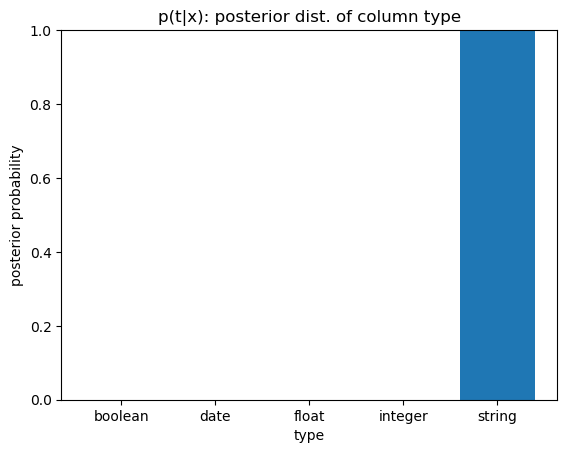

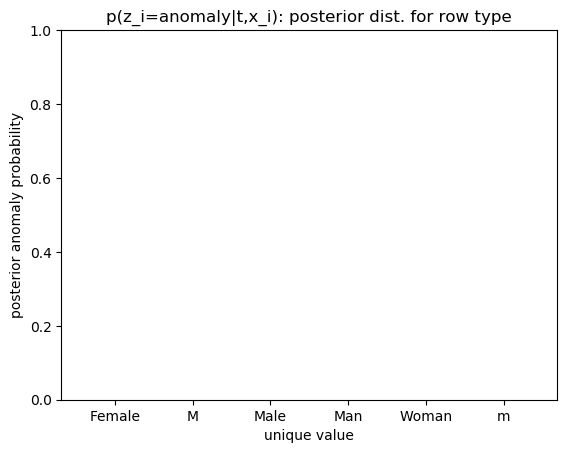

In [9]:
schema = ptype.schema_fit(df_subsample)
# features = ptype.features[column]
# arff_type, arff_post = column2ARFF.get_arff(features)

plot_column_type_posterior(schema.cols[column].p_t)

# plot_arff_type_posterior(arff_post)


plot_row_type_posterior(schema.cols[column], t='anomaly')